## 1.Logistic Regresstion 필요성

공부시간(X)을 입력하면 합격 여부(Y)를 예측하는 회귀 모델 시각화

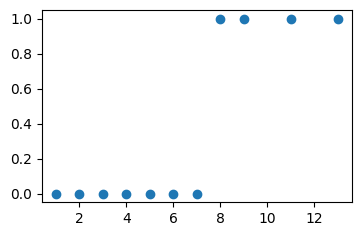

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,11,13])
y = np.array([0,0,0,0,0,0,0,1,1,1,1])
plt.figure(figsize=(4, 2.5))
plt.scatter(x, y)
plt.show()

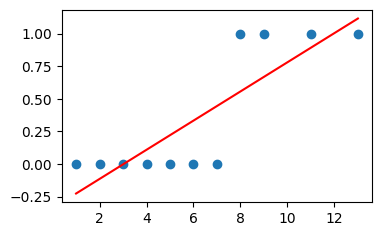

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1,1),y)
plt.figure(figsize=(4, 2.5))
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1,1)), c='red')
plt.show()

- 합격 여부를 의미하는 Y값이 0과 1의 값을 가지는 것이 아니라 -∞에서 +∞의 값을 가지기 때문(즉, 합격할 확률이 120%, -20%와 같이 나올 수 있음)
- 따라서 범주형 레이블에 회귀 모델을 적용할 때는 로지스틱 회귀 분석을 적용

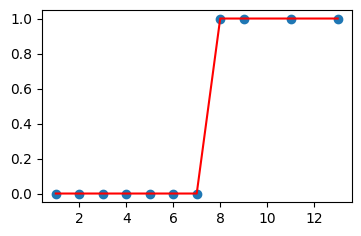

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x.reshape(-1,1),y)
plt.figure(figsize=(4, 2.5))
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1,1)), c='red')
plt.show()

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_05

## 2.분류(classification) 분석

- 하나 혹은 그 이상의 특성들을 이용하여 **범주형 레이블을 예측**하는 기법
- 지도학습(Supervised)
- 분류(classfication) 알고리즘
- 데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측
- 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류함
- **이진 분류 알고리즘(Binary classfication)** : 분류 레이블 0 or 1
- 0 ~ 1 범위를 예측 결과로 갖는 모델 필요하여 가설 결과에 Sigmoid 함수 적용
- 단순하면서 강력한 알고리즘(빠른 속도)
- 예) 스팸 메일 분류기 : 확률이 0.5 이상일 때 스팸으로 분류
- ```sklearn.linear_model.LogisticRegression()```
- 분류 분석 성능 평가 척도
    - 혼동 행렬(Confusion Matrix)는 예측 값이 실제 값과 일치하는지 분류하는 분류표
    - 표의 한쪽 열에는 예측할 범주, 다른 한쪽은 실제 범주를 나타냄
    - 이진 분류의 경우 예측할 범주와 실제 범주에 따라 4가지 지표로 볼 수 있음

LogisticRegression(penalty='l2', C=1.0, tol=0.0001, random_state=None, max_iter=100)

- penalty='l2' (Ridge), l1으로 하면 LASSO
- C=1.0 : Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
    - 결과가 overfitting일 때 C를 이용해서 해결
- max_iter=100 : Maximum number of iterations taken for the solvers to converge. Tolerance값보다 작으면 max_iter 전에 빠져나옴
    - Undefitting일 경우 크게, overfitting일 경우 작게 설정
- tol=0.0001 : Tolerance for stopping criteria.
    - Overfitting일 경우 크게 설정
- random_state=None

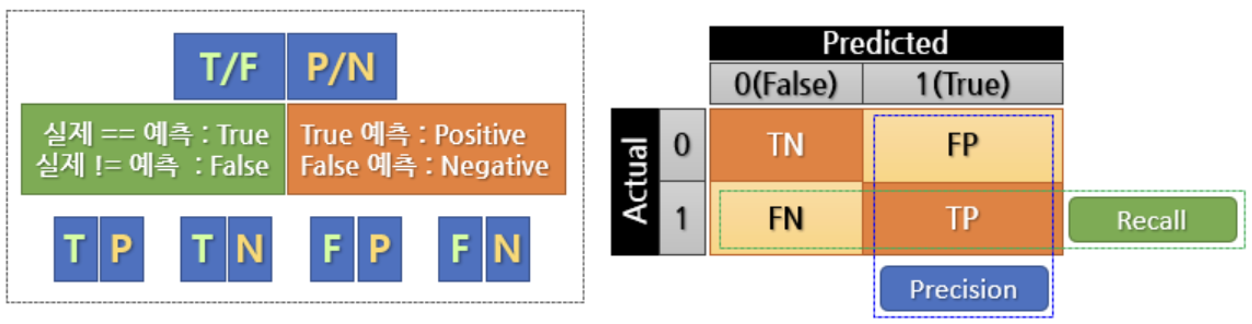

## 3.로지스틱 회귀분석 원리
- Linear Regression에서 Y=ax+b로 모델링
- Logistic Regression : 성공할 확률 P(Y=1) = ax+b로 가정함
   - P(Y=1) : 성공할 확률의 범위는 0~1
   - ax + b의 범위는 -inf ~ inf 
   - 범위를 맞추기 위해 P(Y=1)의 범위를 -inf ~ inf 로 변형시킴
- Logit(= Log-odds)를 적용하여 P(Y=1)의 범위를 -inf ~ inf로 변형함
- odds = 성공확률/실패확률 = P/(1-P) 이며, odds는 P가 0~1일 때 0 ~ inf 값을 갖는다.
- Log-odds는 log(P/(1-P))로 -inf ~ inf가 된다.

 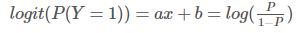  
- Log-odds를 계산한 후, 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률값을 계산한다.
- 설정한 threshold(0.5) 에 맞추어 설정값 이상이면 1, 이하면 0으로 이진분류를 수행한다.

In [12]:
import numpy as np
def sigmoid(z):
    return  1/(1+np.exp(-z))

prob = 0.8
odds = prob/(1-prob)
log_odds = np.log(odds)
r = sigmoid(log_odds)   
print(odds, log_odds, prob, r) 

4.000000000000001 1.3862943611198908 0.8 0.8


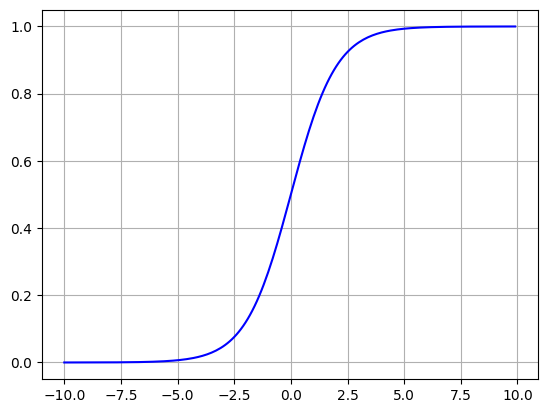

In [14]:
X = np.arange(-10,10,0.1)
Y=sigmoid(X)
Y

import matplotlib.pyplot as plt
plt.plot(X,Y, 'b-')
plt.grid(True)
plt.show()

## 4.Wisconsin Diagnostic Breast Cancer  

In [15]:
# data_05/breast_cancer.csv에서 데이터를 가져온다
# target : ['malignant', 'benign'] # 악성 = 0, 양성 =1
import pandas as pd
cancer = pd.read_csv('data_05/breast_cancer.csv')
X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

In [16]:
cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [18]:
# Target에 대해 value_counts 해보는 이유는 target이 균등하게 분포되어 있는지 보기 위해
# 분류 분석에서는 target이 균등 분포일 때 성능평가가 쉬움
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: class, dtype: float64

불균형 데이터 - SMOTE로 불균형 데이터 해결

In [23]:
# 나중에 밑에서 test_data_split 하고 다시 보자

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit(X_train,y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

NameError: name 'X_train' is not defined

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 전처리 - Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 암 데이터를 층화추출 적용(stratify=y)하고, 75%:25%로 분할한다 (random_state=0 사용)
A = x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, stratify=y, test_size=0.25)
x_train, x_test, y_train, y_test = A

[x.shape for x in [x_train, x_test, y_train, y_test]]

[(426, 30), (143, 30), (426,), (143,)]

In [27]:
from sklearn.linear_model import LogisticRegression
# train 데이터를 사용하여 LogisticRegression 모델을 학습시켜 model 이라는 이름을 지정한다.
# (max_iter=10000) 지정 - 충분한 반복을 할 수 있도록 하기 위해
# train, test에 대한 성능을 확인한다
model = LogisticRegression()
model.fit(x_train, y_train)
print(f'train accuracy : {model.score(x_train, y_train)*100:.2f}%') 
print(f'test accuracy  : {model.score(x_test, y_test) *100:.2f}%')

# 회귀에서는 model.score가 R^2 값이지만 분류에서는 accuracy임

train accuracy : 99.06%
test accuracy  : 95.80%


In [31]:
# x_test 를 사용하여 LogisticRegression 모델이 예측 결과를 구하고,
# 그 중 5개를 출력한다
# model.predict(입력) 사용
model.predict(x_test[:5])

array([1, 0, 0, 1, 0], dtype=int64)

In [33]:
y_test.iloc[:5].to_numpy()

array([1, 0, 0, 1, 0], dtype=int64)

## 5.모델 예측의 불확실성 추정
- model.predict_proba(x_test)
    - instance 개수 만큼, 각 클래스에 대한 확률 반환
    - (n_samples, n_classes)
- model.decision_function(x_test)
    - instance 개수 만큼의 실수 반환
    - (n_samples,)
    - 2진 분류기에서 음수는 첫 번째 클래스, 양수는 두 번째 클래스를 의미한다

In [37]:
# model.predict_proba 를 사용하여 LogisticRegression 모델의 확률을 구하고
# 그 중 5개를 출력한다
model.predict_proba(x_test[:5])

array([[4.24997990e-03, 9.95750020e-01],
       [9.99975598e-01, 2.44016916e-05],
       [9.99788050e-01, 2.11949756e-04],
       [4.20301419e-04, 9.99579699e-01],
       [9.97575427e-01, 2.42457347e-03]])

In [35]:
# decision_funcion을 사용하여 LogisticRegression 모델의 결과를 조회한다
# 그 중 5개를 출력한다
model.decision_function(x_test)[:5]

array([  5.45658199, -10.6208337 ,  -8.45894934,   7.77411805,
        -6.01967214])

## 6.손글씨 분류(다항 분류)

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()

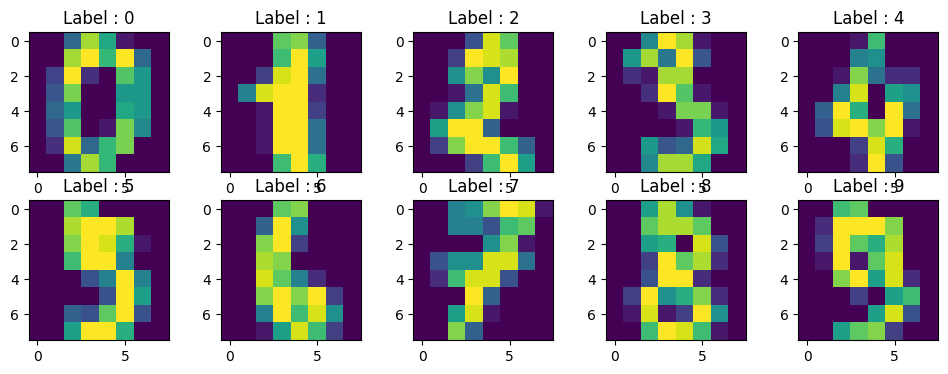

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()
    

In [3]:
# 파일에서 데이터 가져오기
import pandas as pd
digits = pd.read_csv('data_05/digits.csv')
X = digits.iloc[:, :-1]
y = digits.iloc[:, -1]

In [4]:
y.value_counts(normalize=True)

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: class, dtype: float64

In [47]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [45]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [46]:
X.nunique()

0      1
1      9
2     17
3     17
4     17
      ..
59    17
60    17
61    17
62    17
63    17
Length: 64, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터를 분할한다
# 층화추출법을 적용, random_state=0을 사용한다
A = train_test_split(X,y, random_state=0, stratify=y)
x_train, x_test, y_train, y_test = A

# max_iter를 10000으로 설정
model = LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

In [40]:
# Train Score가 1.0이니까 과대적합이니까 Penalty를 주자
model = LogisticRegression(C=0.01, max_iter=10000)
model.fit(x_train,y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9933184855233853, 0.9755555555555555)

In [35]:
y_test.iloc[:2].to_numpy()

array([2, 0, 4, 9, 4, 1, 2, 4, 6, 7], dtype=int64)

In [39]:
# 예측 결과를 2개 출력해 본다
model.predict(x_test[:2])

array([2, 0], dtype=int64)

In [38]:
# 예측 확률을 2개 출력해 본다
model.predict_proba(x_test[:2]).round(2)

#각각 값은 0일 확률, 1일 확률, 2일 확률 등등

array([[0.09, 0.  , 0.68, 0.22, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ]])

## 7.분류분석 성능평가

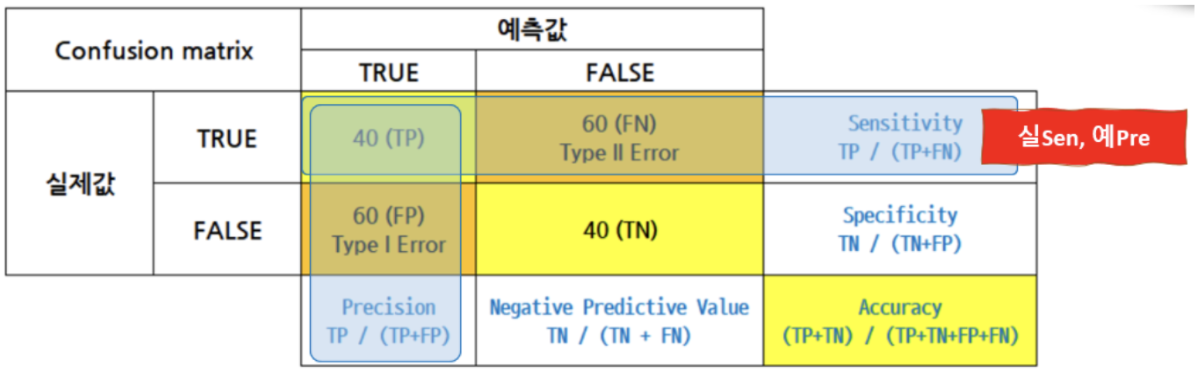

### 7-1.이항 분류 모델의 평가지표


#### 7-1-1.sklearn.mertics API 사용
- sklearn.metrics.confusion_matrix(y_true, y_pred) : 오분류표
- sklearn.metrics.accuracy_score(y_true, y_pred) = (TP/TN) / (TP+TN+FP+FN)
- sklearn.metrics.precision_score(y_true, y_pred) = TP / (TP + FP)
- sklearn.metrics.recall_score(y_true, y_pred) = TP / (TP + FN)
- sklearn.metrics.f1_score(y_true, y_pred = 2 * (Precison * Recall) / (Precision + Recall)
- 참고 : https://gaussian37.github.io/ml-concept-ml-evaluation/

In [ ]:
# [0] 성능평가 관련 함수
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np
import pandas as pd

y_true = np.array([0, 1, 0, 0])   # 0 : 3개, 1 : 1개, 불균형한 데이터인 경우 
y_pred = np.array([0, 1, 1, 0])
cm = pd.DataFrame(confusion_matrix(y_true, y_pred))
print(cm)
# 전체에서 맞춘것의 비율 : 3/4
print('accuracy  : %.2f' % accuracy_score(y_true, y_pred))
# positive(1) 로 예측한 것 중에 맞춘 것 : 1/2
print('precision : %.2f' % precision_score(y_true, y_pred))
# positive(1) 가 실제인 것 중에 맞춘 것 : 1/1
print('recall    : %.2f' % recall_score(y_true, y_pred))
# f1 : precision, recall 의 조화 평균
print('f1        : %.2f' % f1_score(y_true, y_pred))

   0  1
0  2  1
1  0  1
accuracy  : 0.75
precision : 0.50
recall    : 1.00
f1        : 0.67


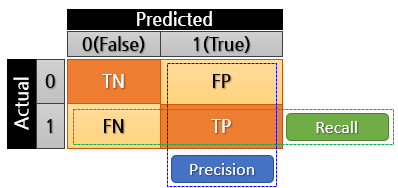

In [ ]:
# 성능 출력 함수 만들기
# accuracy, precision, recall, f1
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

def get_scores(model, xtest, ytest):
    pass

In [ ]:
from sklearn.linear_model import LogisticRegression

def make_models(xtrain, xtest, ytrain, ytest):
    pass
    

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_05

Cloning into 'data_05'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
# 암 데이터를 가져와 cancer로 이름을 지정한다
cancer = 


((569, 30), (569,))

In [ ]:
# 데이터 분리, 모델호출







#### 7-1-2.특이도, FP Rate
- Specificity(특이도) : 실제 False인데 예측이 False로 된 것의 비율
   - TN / (TN + FP)
- FP Rate : 실제 False인데 예측이 True로 된 것의 비율
  - FP / (TN + FP), 1 - Specificity   

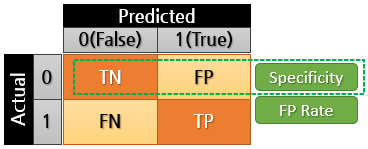

In [ ]:
# 식을 사용하여 Specificity와 FP Rate를 구해본다
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
m = confusion_matrix(y_test, y_pred)
TN, FP = m[0]
specificity = TN/(TN+FP)
FPRate = 1 - specificity
print(m)
print(f'specificity:{specificity:.2f}, FPRate:{FPRate:.2f}')

[[50  3]
 [ 3 87]]
specificity:0.94, FPRate:0.06


#### 7-1-3.ROC(Receiver Operating Characteristics) Curve
  - 가로축을 1-specificity, 세로축을 recall로 하여 시각한 그래프
  - sklearn.metrics.roc_curve 사용
  - area가 넓을 수록 좋은 모델임
  - ```https://en.wikipedia.org/wiki/Receiver_operating_characteristic```

  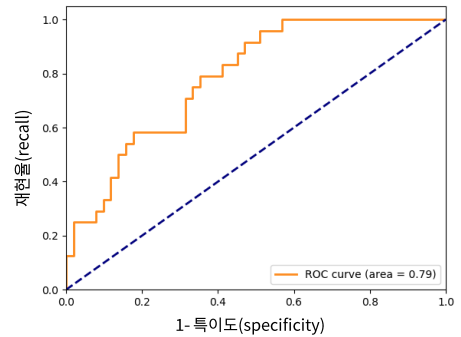

In [ ]:
recall : 1에 가까운 값
1-특이도 (FP Rate) : 0에 가까운 값

In [ ]:
# ROC curve 그래프에 필요한 데이터 준비
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_proba = model.predict_proba(x_test)[:,1]
FP, TP, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(FP, TP)  
#roc_auc = roc_auc_score(y_test, y_pred_proba)  # 동일 방법
print('AUC : %.3f' % (roc_auc))
print(thresholds)

AUC : 0.995


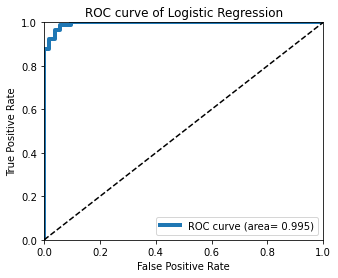

In [ ]:
import matplotlib.pyplot as plt
# ROC curve 그래프 그리기
plt.figure(figsize=(5, 4))
plt.plot(FP, TP, label='ROC curve (area= %.3f)' % roc_auc, linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### 7-2.다항 분류 모델의 평가지표
- sklearn.metrics.accuracy_score(y_true, y_pred) = (TP/TN) / (TP+TN+FP+FN)
- sklearn.metrics.precision_score(y_true, y_pred) = TP / (TP + FP)
- sklearn.metrics.recall_score(y_true, y_pred) = TP / (TP + FN)
- sklearn.metrics.f1_score(y_true, y_pred = 2 * (Precison * Recall) / (Precision + Recall)
- precision_score, recall_score, f1_score의 average parameter에 None, "micro", "macro", "weighted"를 사용해야함 (class가 binary가 아닌 경우 필수)
- 참고 : https://gaussian37.github.io/ml-concept-ml-evaluation/

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np

y_true = [0, 1, 0, 0, 1, 2]  #  불균형 데이터 [3, 2, 1]개 데이터
y_pred = [0, 2, 1, 0, 0, 1]
print(confusion_matrix(y_true, y_pred))
print('accuracy  : %.4f' % accuracy_score(y_true, y_pred))
print('-' * 20)
# Precision : 예측이 True 인 것 중 실제도 True
# average=None, 각 class 별로 precision을 구해라
print(precision_score(y_true, y_pred, average=None))  
print('precision (micro): %.4f' % precision_score(y_true, y_pred, average='micro'))    # 2/6
print('precision (macro): %.4f' % precision_score(y_true, y_pred, average='macro'))    # 0.66 / 3
print('precision (weighted): %.4f' % precision_score(y_true, y_pred, average='weighted')) # 가중치준 precision의 합/6

[[2 1 0]
 [1 0 1]
 [0 1 0]]
accuracy  : 0.3333
--------------------
[0.66666667 0.         0.        ]
precision (micro): 0.3333
precision (macro): 0.2222
precision (weighted): 0.3333


In [ ]:
# average=None
# 예측을 0으로 한 것 중 실제 0인 것, 예측을 1로 한 것 중 실제 1, 예측을 2로 한 것 중 실제 2
a = [2/3, 0/2, 0/1]
print(a)

[0.6666666666666666, 0.0, 0.0]


In [ ]:
# average = 'micro' -> accuracy
# 전체 중에서 맞춘 것
2/6

0.3333333333333333

In [ ]:
# average = 'macro' -> average=None일때의 모든 값을 더해 class 개수로 나눈 것
sum(a)/3

0.2222222222222222

In [ ]:
# precision 의 average='weighted'  
# average=None일때의 모든 값에 각 class의 데이터 개수를 곱하여 합을 구하고
# 전체 데이터 개수로 나눈 것
import pandas as pd
a = [2/3, 0/2, 0/1]
b = [3, 2, 1]
a = pd.Series(a)
b = pd.Series(b)
(a * b).sum() / 6

0.3333333333333333